In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
from urllib3 import request
import io
%matplotlib inline

Read Data

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [7]:
submission_data = pd.read_csv('sample_submission.csv')

In [10]:
train_data.count()
train_data.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [11]:
test_data.count()
test_data.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


In [12]:
submission_data.count()
submission_data.head()

,id,landmarks
0,000088da12d664db,8815 0.03
1,0001623c6d808702,7249 0.61
2,0001bbb682d45002,5328 0.5
3,0002362830cfe3a3,4188 0.96
4,000270c9100de789,10506 0.82


Data Quality

In [13]:
missing = train_data.isnull().sum()

In [14]:
missing

id             0
url            0
landmark_id    0
dtype: int64

Unique Value

In [16]:
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

In [17]:
test_data.nunique()

id     117703
url    117703
dtype: int64

In [18]:
concatenated = pd.concat([train_data, test_data])
concatenated.shape

(1342732, 3)

In [19]:
concatenated.nunique()

id             1342732
landmark_id      14951
url            1342732
dtype: int64

Landmarks

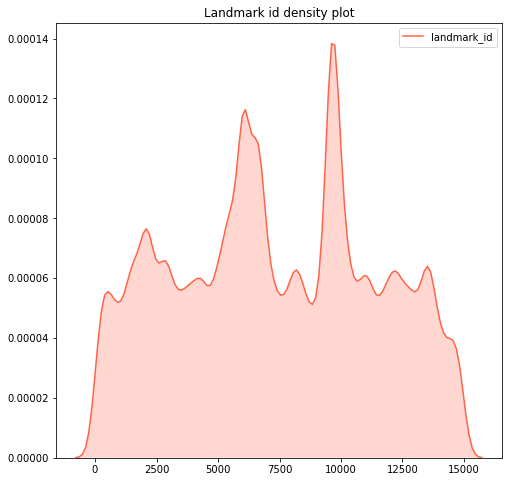

In [22]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train_data['landmark_id'], color='tomato', shade=True)
plt.show()

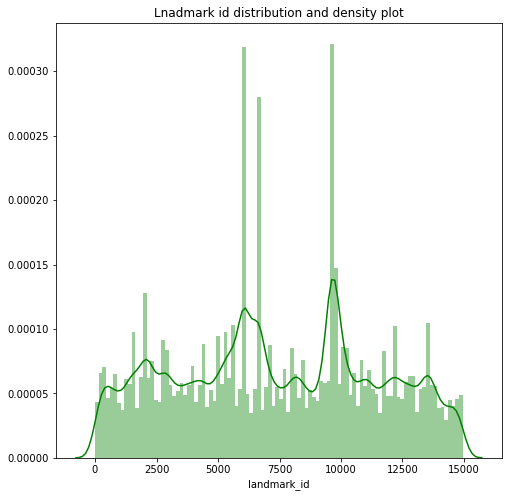

In [24]:
plt.figure(figsize = (8,8))
plt.title('Lnadmark id distribution and density plot')
sns.distplot(train_data['landmark_id'], color='green', kde=True, bins=100)
plt.show()

Most frequent landmarks

In [25]:
th10 = pd.DataFrame(train_data.landmark_id.value_counts().head(10))
th10.reset_index(level=0, inplace = True)
th10.columns=['landmark_id', 'count']
th10

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222
8,5376,9216
9,2743,8997


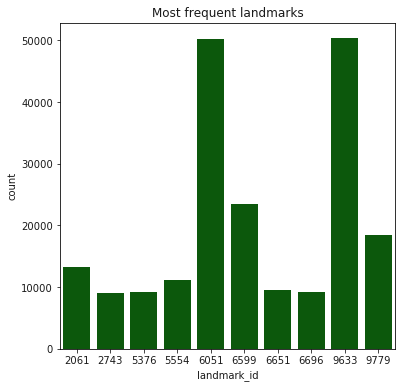

In [26]:
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes('pastel')
sns.barplot(x='landmark_id', y  = 'count', data=th10, label='Count', color='darkgreen')
plt.show()

Least Frequent landmarks

In [28]:
tb10 = pd.DataFrame(train_data.landmark_id.value_counts().tail(10))
tb10.reset_index(level=0, inplace=True)
tb10.columns=['landmark_id', 'count']
tb10

,landmark_id,count
0,10007,1
1,2683,1
2,4753,1
3,6261,1
4,4144,1
5,1527,1
6,6025,1
7,4334,1
8,5865,1
9,8381,1


image path

In [47]:
ll = list()
for path in train_data['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site']=ll

ll = list()
for path in test_data['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site'] = ll

In [30]:
train_data.head()

,id,url,landmark_id,site
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676,static.panoramio.com
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651,lh6.ggpht.com
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284,lh6.ggpht.com
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429,lh3.googleusercontent.com
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231,lh5.googleusercontent.com


In [48]:
test_data.head()

,id,url,site
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


In [51]:
pd.DataFrame(train_data.site.value_counts())

,site
lh3.googleusercontent.com,182010
lh4.googleusercontent.com,177774
lh5.googleusercontent.com,175251
lh6.googleusercontent.com,171506
lh3.ggpht.com,105043
lh4.ggpht.com,102460
lh6.ggpht.com,102066
lh5.ggpht.com,100905
mw2.google.com,94947
static.panoramio.com,12468


In [52]:
pd.DataFrame(test_data.site.value_counts())

,site
lh3.googleusercontent.com,116855
lh3.ggpht.com,166
lh5.ggpht.com,134
lh4.ggpht.com,123
images1-focus-opensocial.googleusercontent.com,102
lh6.ggpht.com,92
lh5.googleusercontent.com,80
lh4.googleusercontent.com,55
static.panoramio.com,47
lh6.googleusercontent.com,28
